In [44]:
import pennylane as qml
import numpy as np

In [45]:
dev = qml.device('qiskit.aer',wires = 2)
#@qml.qnode(dev)

def phase_flip_multi(solns):
    print(solns)
    array = np.identity(2**len(solns[0]))
    for i,soln in enumerate(solns):
        index = np.ravel_multi_index(soln,[2]*(len(soln))) #Gives the index of a soln on all possible orthogonal basis.
        array[index,index] = -1
    return array

def phase_flip_single(soln):
    array = np.identity(2**len(soln))
    index = np.ravel_multi_index(soln,[2]*(len(soln))) #Gives the index of a soln on all possible orthogonal basis.
    array[index,index] = -1
    return array

primary_soln = [1,0,1]    
phase_flip_single(primary_soln)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [46]:
#Lets say we have two solutions
s = [[0,1,1],[1,0,1]]
phase_flip_multi(s)

[[0, 1, 1], [1, 0, 1]]


array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

### Grover Search.
G.1.1

In [47]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    for i in range(len(combo)): qml.Hadamard(wires = i)
    oracle = oracle_matrix(combo)
    qml.QubitUnitary(oracle,wires = [i for i in range(len(combo))])
    ##################
    # YOUR CODE HERE #
    ##################
    return qml.state()
combo = [0,0,0,1]
ans = oracle_amp(combo)
ans = [a.real for a in ans]


In [48]:
import matplotlib.pyplot as plt
def plot_results(ans):
    fig = plt.figure(figsize=(8.0,8.0))
    ax = fig.add_axes([0,0,1,1])
    ranges  = [np.binary_repr(i,4) for i in range(len(ans))]
    plt.title("Phase flip in Grover Algorithm")
    ax.bar(ranges,ans)
    plt.xlabel("Qubits")
    plt.ylabel("probabilities")
    plt.show()

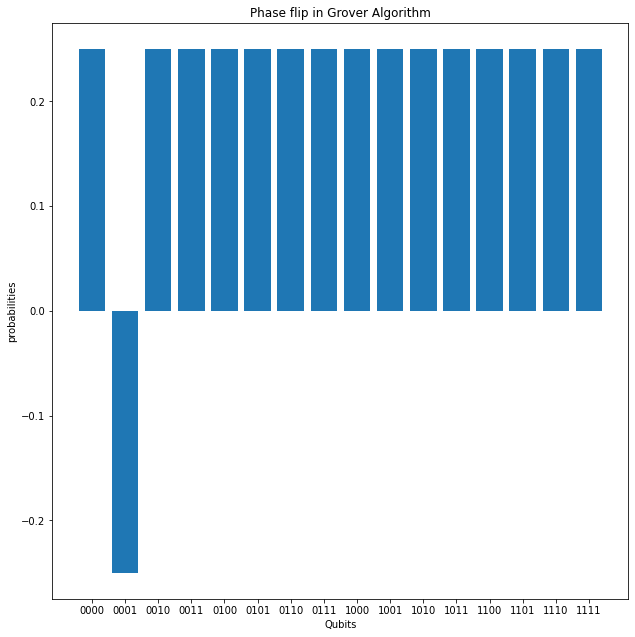

In [49]:
plot_results(ans)

In [50]:
n_bits = 4

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    ones = np.ones((4*4,4*4))
    identity = np.eye(N=4*4,M=4*4)
    scale = 1/(2**3)
    array = scale*ones - identity
    return array

@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    for i in range(4): qml.Hadamard(wires = i)
    qml.QubitUnitary(oracle_matrix(combo),wires = [0,1,2,3])
    qml.QubitUnitary(diffusion_matrix(),wires = [0,1,2,3])
    ##################
    # YOUR CODE HERE #
    ##################
    return qml.state()

In [51]:
combo=[0, 0, 0, 0]
ans = difforacle_amp(combo)
print(ans)

[0.6875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j
 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j
 0.1875+0.j 0.1875+0.j 0.1875+0.j 0.1875+0.j]


/Users/bikramkhanal/miniforge3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


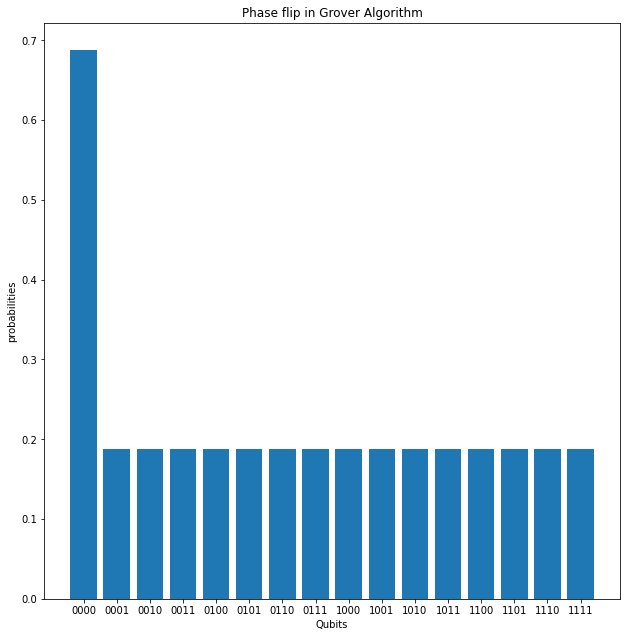

In [52]:
plot_results(ans)

In [53]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The resulting quantum state.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(len(combo)): qml.Hadamard(wires = i)
    for i in range(2):
        qml.QubitUnitary(oracle_matrix(combo),wires = [0,1,2,3])
        qml.QubitUnitary(diffusion_matrix(),wires = [0,1,2,3])
    return qml.state()
ans = two_difforacle_amp(combo)

/Users/bikramkhanal/miniforge3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


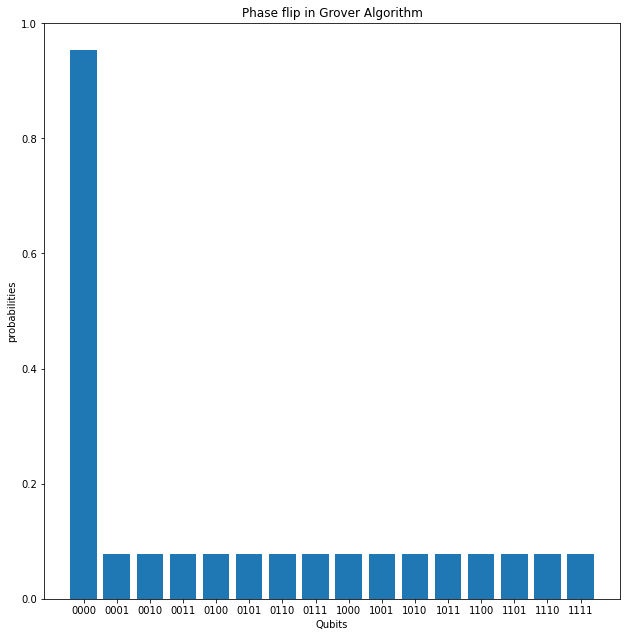

In [54]:
plot_results(ans)

## G.2 
Few things to note here. $U_f = I - \ket{s}\bra{s}$ flips the phase, and $D = \ket{\psi} \bra{\psi}$ rotates along $\ket{\psi}$ axis.\
So, if we apply $\sqrt{N}$ times, we will amplify our amplitude.

Codercise G.2.1. Create a circuit which runs $G=DU_f$ some specified number of times, and manually set the step number my_steps. The results  in the two-dimensional geometry will be displayed for combo = [0, 0, 0, 0, 0]. The oracle and diffusion matrices are defined below, and available by calling oracle_matrix(combo) and diffusion_matrix(). \
From the plots, confirm that applying the Grover operator rotates the state vector, and determine the optimal number of Grover steps for $n=5$.

In [55]:
n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1/2**n_bits)*np.ones(2**n_bits)
    print(psi_piece)
    ident_piece = np.eye(2**n_bits)
    print(ident_piece)
    return (2*psi_piece - ident_piece)


In [56]:
combo = [0,0,0,0,0]
ans = oracle_matrix(combo)
#print(ans)
ans_diff = diffusion_matrix()

[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [57]:
@qml.qnode
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition 
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns: 
        array[complex]: The quantum state (amplitudes) after repeated Grover 
        iterations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits): qml.Hadamard(wires = i )
    for i in range(num_steps):
        qml.QubitUnitary(oracle_matrix(combo),wires = [j for j in range(n_bits)])
        qml.QubitUnitary(diffusion_matrix(),wires = [j for j in range(n_bits)])
    return qml.state()

my_steps = 4 # YOUR STEP NUMBER HERE

In [58]:
y_hat = 0.5
y = 0
loss = - (y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
print(loss)
x=np.array([[[1],[2]],[[3],[4]]])
print(x.shape)
a = np.random.randn(3,3)
b = np.random.randn(2,1)
# c = a + b
# print(c.shape) Not possible
a = np.random.randn(4,3)
b = np.random.randn(3,2)
# c = a * b
# print(c.shape)
a = np.random.randn(12288,150)
b = np.random.randn(150,45)
c = np.dot(a,b)
print(c.shape)
a = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
b = np.array([[5],[6],[7],[8]])
k = np.zeros((3,4))
print(a.shape,b.shape)
for i in range(3):
    for j in range(4):
        k[i][j] = a[i][j] + b[j]
print(k.shape)

0.6931471805599453
(2, 2, 1)
(12288, 45)
(3, 4) (4, 1)
(3, 4)


In [59]:
a = np.eye(3,3)
b = np.eye(3,3)
c = a **2  + b.T **2
c.shape

(3, 3)

## G.3 Searching with Circuits.

### Codercise G.3.1
Define the oracle operator $\hat U$ using the $MultiControlledX$ gate from PennyLane.

In [60]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit",wires=all_wires)
combo = [1,0,1,1]
'''
This oracle will flips the phase of the qubits in the query_register if the state is an
actual solution, i.e the combo.
'''
def oracle(combo):
    combo_string  = "".join(str(x) for x in combo)
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=combo_string)
oracle(combo)


/Users/bikramkhanal/miniforge3/lib/python3.9/site-packages/pennylane/ops/qubit/non_parametric_ops.py:1766: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


### Codercise G.3.2
mplement the diffusion operator in terms of the $multi-controlledX$

In [61]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.
    
    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)
def diffusion():
    """Implement the diffusion operator using the Hadamard transform and 
    multi-controlled X."""

    ##################
    # YOUR CODE HERE #
    ##################
    join_str = "0"*len(query_register)
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=join_str)
    hadamard_transform(query_register)
diffusion()

### Codercise G.3.3
In the code below, create a circuit which prepares the uniform superposition in the query register, places the auxiliary qubit in the $\ket{-}$ state, and applies a single Grover iteration using MultiControlledX. We will plot the output for combo = [0, 0, 0, 0, 0]. Note that the subcircuits oracle(combo), hadamard_transform(my_wires) and diffusion() are provided for you and do not need to be reimplemented.

In [62]:
@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on 
    query register.
    
    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    hadamard_transform(query_register)
    qml.PauliX(wires=aux)
    qml.Hadamard(wires=aux)
    oracle(combo)
    diffusion()
    return qml.probs(wires=query_register)
ans = grover_circuit([0,0,0,0,0])


In [63]:
def plot_results(ans):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_axes([0,0,1,1])
    ranges  = [np.binary_repr(i,5) for i in range(len(ans))]
    plt.title("Phase flip in Grover Algorithm")
    ax.bar(ranges,ans)
    plt.xlabel("Qubits")
    plt.ylabel("probabilities")
    plt.xticks(rotation=90)
    plt.show()

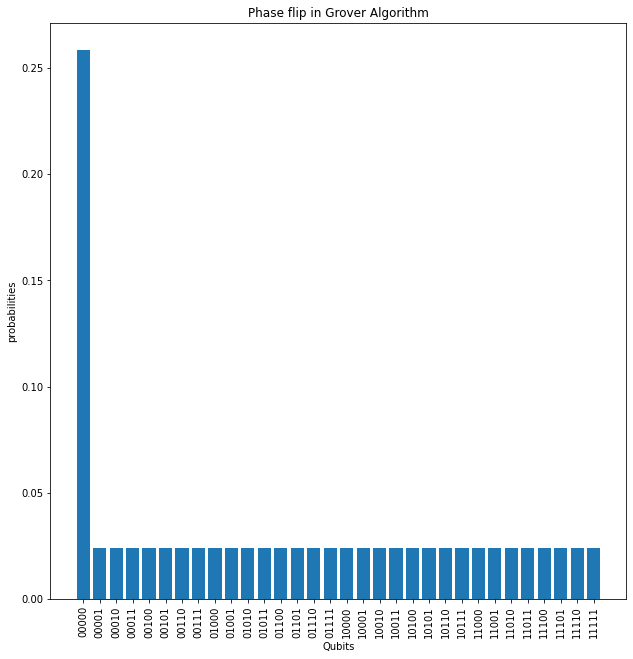

In [64]:
plot_results(ans)

### G.4 Steps And Speedups
Complete the function below, which implements Grover search for a given secret combination and number of Grover steps. The oracle, Hadamard transform and diffusion operator are provided as oracle(combo), hadamard_transform(my_wires), and diffusion(n_bits).

In [65]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.
    
    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register+aux
    dev = qml.device('default.qubit', wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT
        qml.PauliX(wires = aux)
        hadamard_transform(all_wires)
        for i in range(num_steps):
            oracle(combo)
            diffusion()
        return qml.probs(wires=query_register)
    
    return inner_circuit()

In [68]:
n_list = range(3,7)
opt_steps = []

for n_bits in n_list:
    combo = "0"*n_bits # A simple combination
    step_list = range(1,10) # Try out some large number of steps
    ##################
    # YOUR CODE HERE #
    ##################
    local_results = []
    for i in step_list:
        current_result = grover_iter(combo,i)
        local_results.append(current_result[0])
    opt_steps.append(max(local_results))
        

print("The optimal number of Grover steps for qubits in", [3,4,5,6], "is", opt_steps, ".")


## G.5
### Codercise G.5.1. 
Create an oracle for a random solution set of a given size using the MultiControlledX gate. 
Remember that this takes a string for control_values (e.g.,"11011") as a parameter rather than a list of bits.

In [69]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires)

def oracle_multi(combos):
    """Implement multi-solution oracle using sequence of multi-controlled X gates.
    
    Args:
        combos (list[list[int]]): A list of solutions.
    """
    for combo in combos:
        combo_str = ''.join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(control_wires = query_register, wires = aux, control_values = combo_str )
        


### Codercise G.5.2. 
(a) Below, we've provided the routine for regular Grover search, except for the oracle. Using the oracle from the previous exercise, construct the circuit for multi-solution Grover search!

In [70]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires, shots=None)

def grover_iter_multi(combos, num_steps):
    """Run Grover search for multiple secret combinations and a number 
    of Grover steps.
    
    Args:
        combos (list[list[int]]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    @qml.qnode(dev)
    def inner_circuit():
        qml.PauliX(wires=n_bits)
        qml.Hadamard(wires=n_bits)
        hadamard_transform(query_register)

        for _ in range(num_steps):
            ##################
            # YOUR CODE HERE #
            ##################
            oracle_multi(combos)
            diffusion(n_bits)
        return qml.probs(wires=query_register)
    
    return inner_circuit()


In [ ]:
# (b)
m_list = range(3)
opt_steps = []

for m_bits in m_list:
    combos = [[int(s) for s in np.binary_repr(j, n_bits)] for j in range(2**m_bits)]
    step_list = range(1,10)
    ##################
    # YOUR CODE HERE #
    ##################
    local_results = []
    for i in step_list:
        current_result = grover_iter_multi(combos,i)
        local_results.append(current_result[0])
    opt_steps.append(local_max_arg(local_results))

print("The optimal number of Grover steps for the number of solutions in", [1,2,4], "is", opt_steps, ".")
